In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from imageio import imread
from ggcnn_detection import GDetector
from detection import Detector
from detection import config as dcfg

In [3]:
gdet = GDetector(device='cpu')
det = Detector(model='ssd512', dataset='real_with_grasp', ctx='cpu', classes=dcfg.classes_grasp)

/home/cezar/Programs/anaconda3/envs/test_detection/lib/python2.7/site-packages/mxnet/gluon/block.py:1159: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [4]:
rgb_img = imread('data/grasping/samples/pcd0100r.png')
d_img = imread('data/grasping/samples/pcd0100d.tiff')
# d_img = d_img/np.max(d_img)

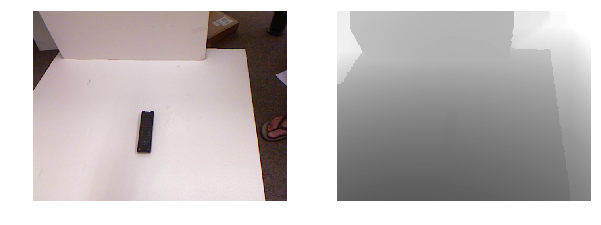

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axs[0].imshow(rgb_img, cmap='gray')
axs[0].set_axis_off()
axs[1].imshow(d_img, cmap='gray')
axs[1].set_axis_off()

In [6]:
go = gdet.detect(d_img)

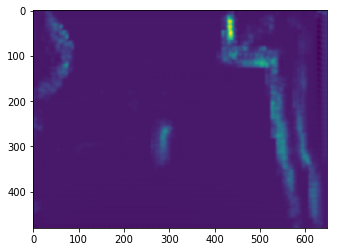

In [7]:
plt.imshow(go.q_img)

In [8]:
draw_img = go.draw_best(rgb_img)

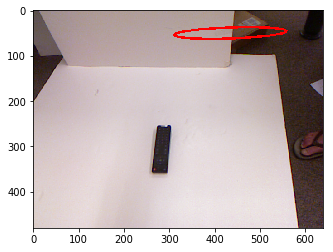

In [9]:
plt.imshow(draw_img)

In [10]:
rgb_img = imread('data/grasping/parts/dosing_nozzle_Color_12767.png')
d_img = pd.read_csv('data/grasping/parts/_Depth_13241.csv', header=None).to_numpy()
rgb_img.shape, d_img.shape

((480, 640, 3), (480, 640))

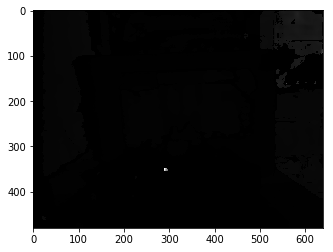

In [11]:
plt.imshow(d_img, cmap='gray')

In [12]:
bboxes, _ = det.detect(rgb_img)
go = gdet.detect(d_img)

In [13]:
len(bboxes)

2

In [14]:
bboxes

[Bbox(351.36, 243.12, 397.91, 294.98, class_id=1, score=0.99, class_name='dosing_nozzle'),
 Bbox(315.58, 259.60, 335.48, 292.38, class_id=8, score=0.71, class_name='grasping_cuboid')]

In [15]:
bbox = bboxes[1]

In [16]:
bp_img = go.draw_best(rgb_img, bbox)

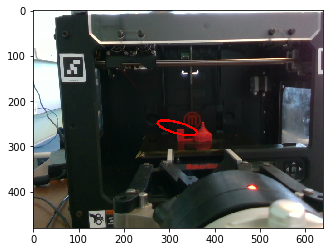

In [17]:
plt.imshow(bp_img)

In [18]:
go.get_best(bbox)

((318, 259), 0.6396479398780973, 0.0, 0.26197379967985057, 45.24837291673636)